In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
times = []
publish_time_taken = []

with open("data.csv") as f:
    reader = csv.reader(f)
    for line in reader:
        times.append(int(line[0]))
        publish_time_taken.append(int(line[1]))

publish_time_taken = np.array(publish_time_taken[1:]) # The first point is not correct
time_delta = np.diff(times) 
jitter = np.abs(time_delta - 1000000)

print("Publish time (ns):        ", np.min(publish_time_taken), np.max(publish_time_taken))
print("Iteration time delta (ns):", np.min(time_delta), np.max(time_delta))
print("Jitter (ns):              ", np.min(jitter), np.max(jitter))

Publish time (ns):         2808 22660
Iteration time delta (ns): 976985 1023701
Jitter (ns):               0 23701


Text(0.5, 0, 'Iteration time delta (us)')

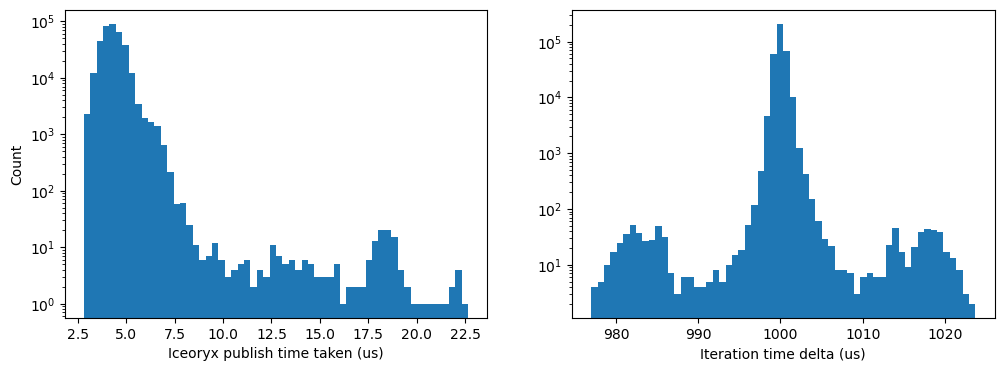

In [3]:
log = True
bins = 60

fig = plt.figure(figsize=[12, 4])
ax = fig.add_subplot(1, 2, 1)
ax.hist(publish_time_taken / 1000, bins=bins, log=log)
ax.set_xlabel("Iceoryx publish time taken (us)")
ax.set_ylabel("Count")

ax = fig.add_subplot(1, 2, 2)
ax.hist(time_delta / 1000, bins=bins, log=log)
ax.set_xlabel("Iteration time delta (us)")